

##  **Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products as mentioned below**

1.   Savings accounts
2.   Current accounts
3.   Investment products
4.   Credit products and others




The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like  such as;
*   Tele-calling
*   E-mails
*   Recommendations on net banking
*   Mobile banking, etc






## **Problem Statement**

Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.


Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

    Customer details (gender, age, region etc.)
    Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)








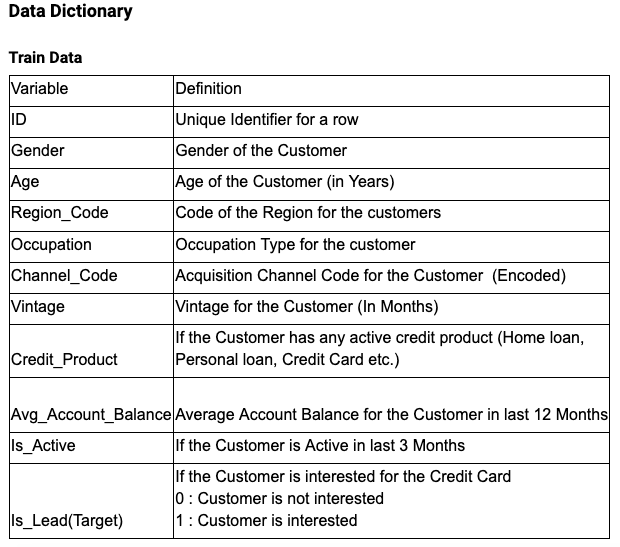

**Test Data**

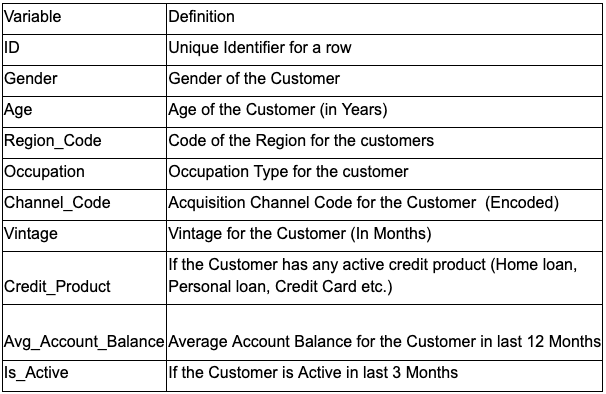

**Sample Submission**

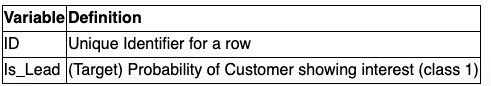

In [ ]:
#Mount Colab to G drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install categorical boost package

!pip3 install catboost

In [ ]:
# Import Scientific and Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import Data Viz & Regular Expression Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit learn preprocessing package
from sklearn.preprocessing import *
from scipy.stats import randint
import pickle

# Import RandomForestClassifier  
from sklearn.ensemble import RandomForestClassifier
# Boosting Algorithm Libraries
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Model Evaluation Metric & Cross Validation Libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 


In [ ]:
# Setting SEED to Reproduce Same Results even with "GPU"
seed_value = 1994
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)

np.random.seed(seed_value)
SEED=seed_value

In [ ]:
# Loading data from train, test and submission csv files

train = pd.read_csv('/content/drive/MyDrive/Loans/train_s3TEQDk.csv')
test = pd.read_csv('/content/drive/MyDrive/Loans/test_mSzZ8RL.csv')
sub = pd.read_csv('/content/drive/MyDrive/Loans/sample_submission_eyYijxG.csv')

##  Performing Exploratory Data Analysis



In [ ]:
#  creat and Assign a list with data_types
data_types = ["float32","float64","int32","int64","object","category","datetime64[ns]"]

#Creat a pandas data frame
data =pd.DataFrame()

In [ ]:
# Data Pipeline, function for Displaying information about Data
def display_data_information(data, data_types, df):
  data.info()
  print("\n")
for VARIABLE in data_types:
  data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
  if len(data_type) > 0 :
    print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n" )

In [ ]:
# Displaying information about "train" data        
display_data_information(train, data_types, "train")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB




# In Train data, It is apparent credit_product column is having missing values, I am assuming for such empty cell data is not available.

In [ ]:
# Displaying information about "test" data 
display_data_information(test, data_types, "test")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB




# In Test data, It is apparent credit_product columnis having missing values, I am assuming for such empty cell data is not available.

In [ ]:
# Function for Displaying top head and rows of data depending on input parameters

def display_head_tail(data, head_rows, tail_rows):
  display("Data Head & Tail :")
  display(data.head(head_rows).append(data.tail(tail_rows)))

In [ ]:
# call function to display head and tail of the train data
display_head_tail(train, head_rows=4, tail_rows=4)

'Data Head & Tail :'

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [ ]:
# Function for displaying description of the Data

def display_data_description(data, numeric_data_types, categorical_data_types):
  print("Data Description :")
  display(data.describe( include = numeric_data_types))
  print("")
  display(data.describe( include = categorical_data_types))

In [ ]:
# Display Data Description of "train data" 

display_data_description(train, data_types[0:4], data_types[4:7])

Data Description :


,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,245725,245725,245725,245725,245725,216400,245725
unique,245725,2,35,4,4,2,2
top,JNURNS6Y,Male,RG268,Self_Employed,X1,No,No
freq,1,134197,35934,100886,103718,144357,150290


# Observation:

 **Vintage is having higher standard deviation of 32 with higher gap between Min value of 7 and Max  value of 135.**

**Age indicates credit holders age starts from 23**

In [ ]:
# Display Data Description of "test data" 
display_data_description(test, data_types[0:4], data_types[4:7])

Data Description :


,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,105312,105312,105312,105312,105312,92790,105312
unique,105312,2,35,4,4,2,2
top,ICGZBVIT,Male,RG268,Self_Employed,X1,No,No
freq,1,57705,15125,43192,44484,61608,63797


 **Similar Observation holds true for test data**

# Check for Duplicate Rows from Train Data

In [ ]:
def remove_duplicate(data):
  data.drop_duplicates(keep="first", inplace=True)
  return "Checked Duplicates"

In [ ]:
remove_duplicate(train)

'Checked Duplicates'

# Plot the data to better understand frequency and distribution

In [ ]:
# check the frequency of Is_Lead variable around Occupation ('Other', 'Salaried', 'Self_Employed', 'Entrepreneur')

df=train.groupby(['Occupation','Is_Lead'])['ID'].count().to_frame().rename(columns={'ID':'count'}).reset_index()

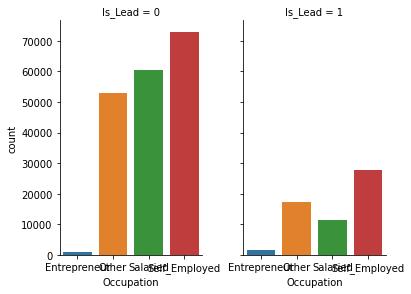

In [ ]:
#Plot the frequency using seaborn package

g = sns.catplot(x="Occupation", y="count",col="Is_Lead",
                data=df, kind="bar",
                height=4, aspect=.7)

 It is apparent that Non lead customers are higher in numbers. In Lead section, self employed and Others are active credit card users of Happy Bank

In [ ]:
# check the frequency of Is_Lead variable around acquisition Channel 

df=train.groupby(['Channel_Code','Is_Lead'])['ID'].count().to_frame().rename(columns={'ID':'count'}).reset_index()

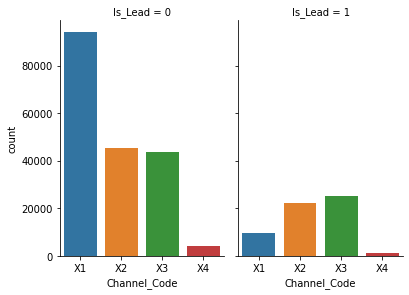

In [ ]:
#Plot the frequency using seaborn package

g = sns.catplot(x="Channel_Code", y="count",col="Is_Lead",
                data=df, kind="bar",
                height=4, aspect=.7)

 Channel X1(encoded) seems to have more customers but are not lead.   X3 and X2 are gaining good number of lead cusotmers compared X1 and X4.

In [ ]:
# check the frequency of Is_Lead variable around Credict Product

df=train.groupby(['Credit_Product','Is_Lead'])['ID'].count().to_frame().rename(columns={'ID':'count'}).reset_index()

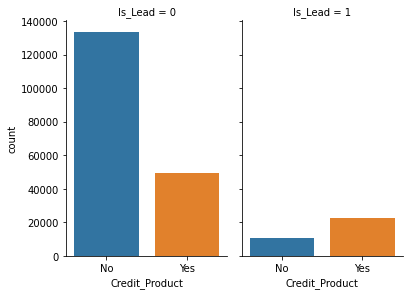

In [ ]:
#Plot the frequency using seaborn package

g = sns.catplot(x="Credit_Product", y="count",col="Is_Lead",
                data=df, kind="bar",
                height=4, aspect=.7)

# It is interesting to not that non credit card holders who are large in numbers are classified as non lead.

In [ ]:
## Plot the frequency of Is Lead variable around region code
df=train.groupby(['Region_Code','Is_Lead'])['ID'].count().to_frame().rename(columns={'ID':'count'}).reset_index()

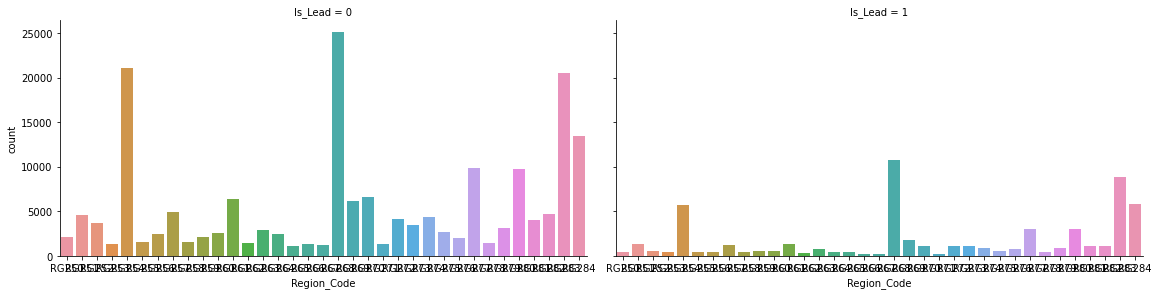

In [ ]:
#Plot the frequency using seaborn package

g = sns.catplot(x="Region_Code", y="count",col="Is_Lead",
                data=df, kind="bar",
                height=4, aspect=2)

# It is apparenet that certain regions are having huge customer base probablyy representing metro  and popular cities with huge population. they will hold higher parameters importance comapared to others

# Print the Unique values of the columns for reference

In [ ]:
# Print the Unique values of the columns for reference

for i in train:
  print(f'column {i} unique values {train[i].unique()}')

column ID unique values ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']
column Gender unique values ['Female' 'Male']
column Age unique values [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23]
column Region_Code unique values ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
column Occupation unique values ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
column Channel_Code unique values ['X3' 'X1' 'X2' 'X4']
column Vintage unique values [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  6

# Should fill nan values in Credit_product column with unk character 

# Plot the distribution of Age variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


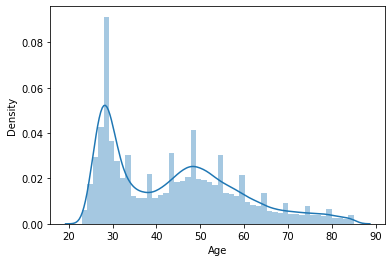

In [ ]:
# Plot the distribution of Age variable

sns.distplot(train.Age)

In [ ]:
## Plot the frequency of Is Lead variable around Age
df=train.groupby(['Age','Is_Lead'])['ID'].count().to_frame().rename(columns={'ID':'count'}).reset_index()

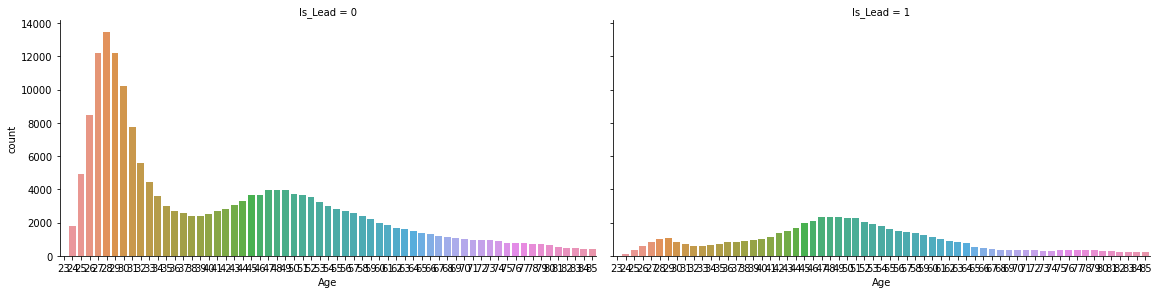

In [ ]:
#Plot the frequency using seaborn package

g = sns.catplot(x="Age", y="count",col="Is_Lead",
                data=df, kind="bar",
                height=4, aspect=2)

# It is apparent that people aged 23 -33's are less likely to Lead cusotmer compared to 33's to 43

# Plot the distribution of Avg_Account_Balance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


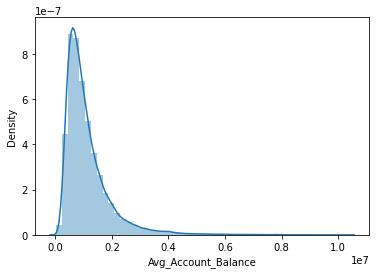

In [ ]:
# Plot the distribution of Avg_Account_Balance variable

sns.distplot(train.Avg_Account_Balance)

# Distribution is left skewed, need to apply log transformation

Plot the Distribution of Vintage variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


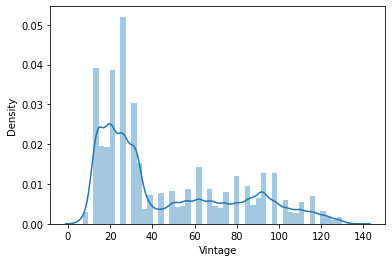

In [ ]:
# Plot the distribution of Vintage variable

sns.distplot(train.Vintage)

#  It is apparent that data is having huge standard deviation, should scale the data appropriately

# Performing the Feature Engineering 

In [ ]:
# Function to assign numerical and cateorical features

def assign_data_description(numeric_data_types, categorical_data_types):
  print("Assigning numerical feature")
  num_feat = numeric_data_types
  print(" Assigning categorical feature ")
  cat_feat = categorical_data_types

In [ ]:
# Concatenate the Train and Test data for feature engineering

combine_set = pd.concat([train,test],axis=0)

In [ ]:
# Display the columns

combine_set.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [ ]:
# replace the empty rows of Credit_Product with UNK for encoding later

combine_set['Credit_Product'].replace(np.nan, 'UNK', inplace=True)

In [ ]:
# Map the Gender variable to int values i.e O for female and 1 for male

combine_set['Gender'] = combine_set['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [ ]:
# Map the Is_Active variable to int values i.e O for No and 1 for Yes

combine_set['Is_Active'] = combine_set['Is_Active'].map( {'No': 0, 'Yes': 1} ).astype(int)

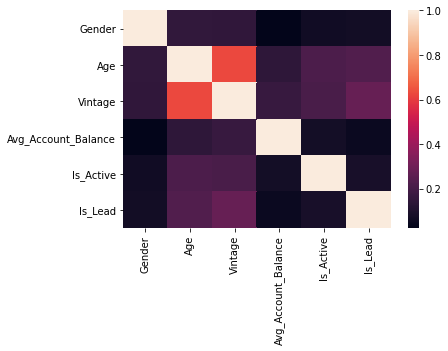

In [ ]:
#Check the correlation of the Numerical features

sns.heatmap(combine_set.corr())

Age and Vintage are having some correlation among each other but less than 85%

# Encode Categorical features to dummy columns/variable

In [ ]:
# Assign list of columns being encoded to column variable 
columns = ['Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product']

#Encode Credit_Product categorical variable to dummy variables using pandas dummy variable function 
df0 = pd.get_dummies(combine_set['Credit_Product'], prefix="Credit_Product")
#Encode Occupation categorical variable to dummy variables using pandas dummy variable function 
df1 = pd.get_dummies(combine_set['Occupation'], prefix="Occupation")
#Encode  Channel_Code categorical variable to dummy variables using pandas dummy variable function 
df2 = pd.get_dummies(combine_set['Channel_Code'], prefix="Channel_Code")
#Encode Region_Code  categorical variable to dummy variables using pandas dummy variable function 
df3 = pd.get_dummies(combine_set['Region_Code'], prefix="Region_Code")

#Concatenate the differet resultant dataframes in to single result dataframe
result = pd.concat([df1, df2, df3, df0], axis=1)

#Drop the categorical variable columns
combine_set.drop(columns=columns, inplace=True)

#Concatenate the result dataframe with combine dataframe 
combine_set =pd.concat([combine_set, result], axis=1)

# #Apply log transform onthe Avg_Account_Balance column 

In [ ]:
#Apply log transform on the Avg_Account_Balance column to remove left skew of the distribution
combine_set['Avg_Account_Balance'] = np.log(combine_set['Avg_Account_Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


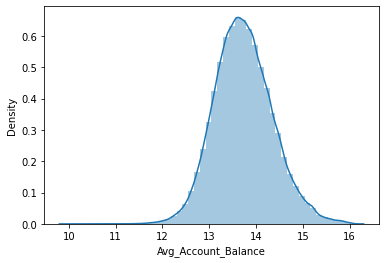

In [ ]:
# Plot the distribution of Avg_Account_Balance variable

sns.distplot(combine_set.Avg_Account_Balance)

# Tried Binning the Age and Vintage variable but dropped as it yielding lower AUC value

In [ ]:
#num_band=["Age", "Vintage"]

In [ ]:
#combine_set['Avg_Account_Balance_band'] = pd.cut(combine_set['Age'], 5,labels=[0,1,2,3,4]).astype(int)

In [ ]:
#combine_set['AgeBand'] = pd.cut(combine_set['Age'], 5,labels=[0,1,2,3,4]).astype(int)

In [ ]:
#combine_set['AgeBand'] = pd.cut(combine_set['Age'], 5,labels=[0,1,2,3,4])

In [ ]:
#combine_set['Vintage_band'] = pd.cut(combine_set['Vintage'], 4,labels=[0,1,2,3]).astype(int)

In [ ]:
#combine_set['Vintage_band'] = pd.cut(combine_set['Vintage'], 4,labels=[0,1,2,3])

In [ ]:
#combine_set.drop(num_band,axis=1, inplace=True)

In [ ]:
# Plot Combine set to see the data
combine_set

,ID,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Credit_Product_No,Credit_Product_UNK,Credit_Product_Yes
0,NNVBBKZB,0,73,43,13.860193,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,IDD62UNG,0,30,32,13.274205,0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,HD3DSEMC,0,56,26,14.210464,1,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,BF3NC7KV,1,34,19,13.061453,0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,TEASRWXV,0,30,33,13.695360,0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,1,52,86,15.260677,1,NaN,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
105308,CWQ72DWS,1,55,86,13.963200,0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
105309,HDESC8GU,1,35,15,14.348329,0,NaN,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
105310,2PW4SFCA,1,53,93,13.510585,1,NaN,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# define pylab as inline function for displaying 

%pylab inline

In [ ]:
#Assign ID values ID variable and drop them from the column

ID = combine_set.ID
combine_set=combine_set.drop('ID',axis=1)

In [ ]:
# Assign the Target Is_Lead variable i.e Ytrain and Ytest values and drop it from combine dataframe

Ytrain =combine_set['Is_Lead'].iloc[:245725]
Ytest =combine_set['Is_Lead'].iloc[245725:]
combine_set.drop('Is_Lead',axis=1, inplace=True)

In [ ]:
# Assign the Train and Test Values

Train=combine_set.iloc[:245725]
Test=combine_set.iloc[245725:]

In [ ]:
#Apply StratifiedKfold function to split the data consisting of balanced class samples in each fold 

skf = StratifiedKFold(n_splits = 10, random_state = 42)

for train_idx, val_idx in skf.split(Train, Ytrain):
    x_train, x_val = Train.iloc[train_idx], Train.iloc[val_idx]
    y_train, y_val = Ytrain.iloc[train_idx], Ytrain.iloc[val_idx]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Apply data scalers if neccessary

In [ ]:
#from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

# data normalization with sklearn
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


#scaler = StandardScaler()
#scaler.fit(x_train['Vintage'].values.reshape(-1, 1))

#mm = MinMaxScaler()
#mm.fit(x_train['Vintage'].values.reshape(-1, 1))


# fit scaler on training data
#x_train['Vintage'] = scaler.transform(x_train['Vintage'].values.reshape(-1, 1))
#x_train['Vintage'] = mm.transform(x_train['Vintage'].values.reshape(-1, 1))

# transform testing dataabs
#x_val['Vintage'] = scaler.transform(x_val['Vintage'].values.reshape(-1, 1))

#x_val['Vintage'] = mm.transform(x_val['Vintage'].values.reshape(-1, 1))


#Train['Vintage'] = scaler.transform(Train['Vintage'].values.reshape(-1, 1))
#Train['Vintage'] = mm.transform(Train['Vintage'].values.reshape(-1, 1))




# Build the categorical Boosting classifier Model

In [ ]:
# Import the catBoostClassifier
from catboost import CatBoostClassifier

#call and assign the cat classifier
cat = CatBoostClassifier()

#fit and train the model
cat.fit(x_train, y_train, plot=True, early_stopping_rounds=30, verbose=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.103304
0:	learn: 0.6098350	total: 125ms	remaining: 2m 5s
100:	learn: 0.3420961	total: 5.83s	remaining: 51.9s
200:	learn: 0.3392175	total: 11.6s	remaining: 45.9s
300:	learn: 0.3368865	total: 17.3s	remaining: 40.2s
400:	learn: 0.3347717	total: 23s	remaining: 34.4s
500:	learn: 0.3329308	total: 28.9s	remaining: 28.8s
600:	learn: 0.3311258	total: 34.8s	remaining: 23.1s
700:	learn: 0.3293853	total: 40.6s	remaining: 17.3s
800:	learn: 0.3277571	total: 46.5s	remaining: 11.6s
900:	learn: 0.3261719	total: 52.5s	remaining: 5.77s
999:	learn: 0.3246587	total: 58.4s	remaining: 0us


In [ ]:
#Evaluate the model by predicting the class from trained model using validation data
y_val_pred = cat.predict_proba(x_val)[:,1]

In [ ]:
#calculate the area under score for Cat model
score = roc_auc_score(y_val, y_val_pred)
print(score)

0.8742827092801442


In [ ]:
#Save the cat model

filename = 'cat_model_f.sav'
pickle.dump(cat, open(filename, 'wb'))

In [ ]:
#Assign the model file name
filename = 'cat_model_f.sav'

In [ ]:
# Load the saved cat model
cat_load = pickle.load(open(filename, 'rb'))

In [ ]:
#Predict the Class from trained cat model 
y_pred=cat_load.predict(x_val)

In [ ]:
#Print the classification report
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     18743
         1.0       0.79      0.56      0.65      5829

    accuracy                           0.86     24572
   macro avg       0.83      0.76      0.78     24572
weighted avg       0.85      0.86      0.85     24572



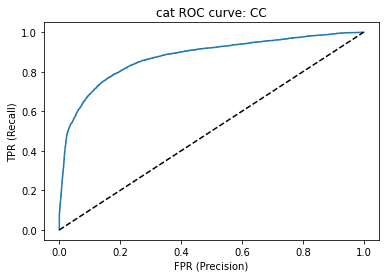

Area under curve (AUC):  0.8742827092801442


In [ ]:
# Print the area under the curve

y_score = cat_load.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('cat ROC curve: CC')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
#predict the probability and save the output of the model for submission

Preds = [pred[1] for pred in cat.predict_proba(Test)]

submission = pd.DataFrame(data = {'ID': id, 'Is_Lead': Preds})
submission.to_csv('cross_sellcat01.csv', index = False)
submission.head()

,ID,Is_Lead
0,<built-in function id>,0.041050
1,<built-in function id>,0.886482
2,<built-in function id>,0.061487
3,<built-in function id>,0.026060
4,<built-in function id>,0.022209


# Random Forest Classifier Model

In [ ]:
# Assign the hyper parameters
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

In [ ]:
# call and intiate the Rf classifier model
clf = RandomForestClassifier()
rfmodel = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)

In [ ]:
# fit and train the Randomforest classifier model
rfmodel.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 11.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Save the model using Pickle
filename = 'rf_model_f.sav'
pickle.dump(rfmodel, open(filename, 'wb'))

In [ ]:
# Assign the model name 
filename = 'rf_model_f.sav'

In [ ]:
#Load the saved Rf model

rf_load = pickle.load(open(filename, 'rb'))

In [ ]:
# predict the class variable from trained Rf model
y_pred= rf_load.predict(x_val)

In [ ]:
# print the classification report
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     18743
         1.0       0.85      0.49      0.62      5829

    accuracy                           0.86     24572
   macro avg       0.86      0.73      0.77     24572
weighted avg       0.86      0.86      0.84     24572



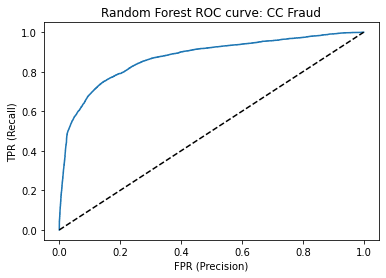

Area under curve (AUC):  0.8719246127063282


In [ ]:
# Print Area under the curve

y_score = rf_load.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
# Predict the probability and save the model
Preds = [pred[1] for pred in rf_load.predict_proba(Test)]
submission = pd.DataFrame(data = {'ID': id, 'Is_Lead': Preds})
submission.to_csv('cross_sellrf01.csv', index = False)
submission.head()

,ID,Is_Lead
0,<built-in function id>,0.066654
1,<built-in function id>,0.806185
2,<built-in function id>,0.050501
3,<built-in function id>,0.031409
4,<built-in function id>,0.026692


# XGB Model

In [ ]:
#Import the XGB classifier from xg boost package
from xgboost import XGBClassifier

In [ ]:
# Assign and intiate the XGb classifier 
xg = XGBClassifier(random_state = 42, learning_rate = 0.1)

In [ ]:
# Fit and train XGB model
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Save the model using Pickle
filename = 'xgb_model_f.sav'
pickle.dump(xg, open(filename, 'wb'))

In [ ]:
# Assign the model name 
filename = 'xgb_model_f.sav'

In [ ]:
#Load the saved Rf model

xg_load = pickle.load(open(filename, 'rb'))

In [ ]:
# predict the class variable from trained XGB model
y_pred= xg_load.predict(x_val)

In [ ]:
# print the classification report
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     18743
         1.0       0.82      0.53      0.64      5829

    accuracy                           0.86     24572
   macro avg       0.84      0.75      0.78     24572
weighted avg       0.86      0.86      0.85     24572



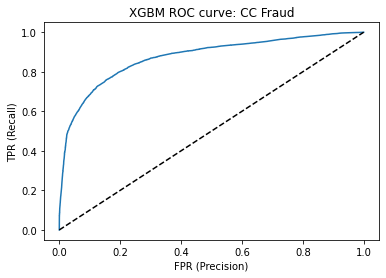

Area under curve (AUC):  0.8737388246378379


In [ ]:
# Print Area under the curve

y_score = xg_load.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('XGBM ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
# Predict the probability and save the model
Preds = [pred[1] for pred in xg_load.predict_proba(Test)]
submission = pd.DataFrame(data = {'ID': id, 'Is_Lead': Preds})
submission.to_csv('cross_sellxg01.csv', index = False)
submission.head()

,ID,Is_Lead
0,<built-in function id>,0.066807
1,<built-in function id>,0.840745
2,<built-in function id>,0.053155
3,<built-in function id>,0.027905
4,<built-in function id>,0.027905


# Light Gradient Boosting Model

In [ ]:
#Import the LGBM classifier from lightgbm package
from lightgbm import LGBMClassifier


In [ ]:
# call and intiate the LGBMclassifier

lgbm = LGBMClassifier(num_leaves = 15, max_depth = 20, n_estimators = 150, learning_rate = 0.3, objective = 'binary', 
                      lambda_l2 = 12, boosting_type='dart',
                      max_bin = 100, metric = 'auc', is_unbalance = False, random_state = None, n_jobs = -1)



In [ ]:
# Fit and train the model
lgbm.fit(x_train,y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', is_unbalance=True, lambda_l2=12,
               learning_rate=0.3, max_bin=100, max_depth=20, metric='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=15, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# Save the model using Pickle
filename = 'lgb_model_f.sav'
pickle.dump(lgbm, open(filename, 'wb'))

In [ ]:
# Assign the model name 
filename = 'lgb_model_f.sav'

In [ ]:
#Load the saved Rf model

lg_load = pickle.load(open(filename, 'rb'))

In [ ]:
# predict the class variable from trained XGB model
y_pred= lg_load.predict(x_val)

In [ ]:
# print the classification report
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.88     18743
         1.0       0.59      0.78      0.67      5829

    accuracy                           0.82     24572
   macro avg       0.76      0.80      0.77     24572
weighted avg       0.84      0.82      0.83     24572



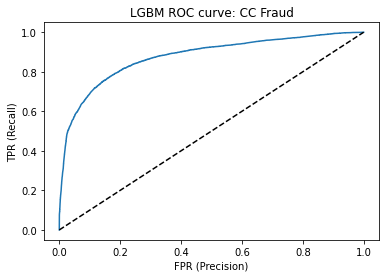

Area under curve (AUC):  0.875966979636714


In [ ]:
# Print Area under the curve

y_score = lg_load.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('LGBM ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
# Predict the probability and save the model
Preds = [pred[1] for pred in lg_load.predict_proba(Test)]
submission = pd.DataFrame(data = {'ID': id, 'Is_Lead': Preds})
submission.to_csv('cross_selllg01.csv', index = False)
submission.head()

,ID,Is_Lead
0,<built-in function id>,0.110342
1,<built-in function id>,0.947781
2,<built-in function id>,0.155782
3,<built-in function id>,0.075090
4,<built-in function id>,0.075005


In [ ]:
print(lg_load.feature_importances_) 

[ 28 388 531 150 137  26  57 146  43  83  22  16  13   5   0   4   3  19
   5   5   2   0   2   3   6   3  10   6   0   3   3  32   6   2   3   5
   3   2   4   1  11   2   4   5   1   8  17  12 128 135   0]


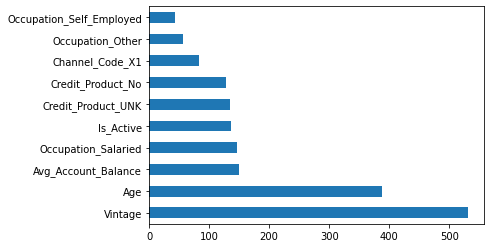

<Figure size 576x432 with 0 Axes>

In [ ]:
feat_imp = pd.Series(lg_load.feature_importances_, index=x_val.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()